In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [2]:
import_data = nfl.import_seasonal_data([2022])   
import_data.columns

Index(['player_id', 'season', 'season_type', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdfd_sh', 'dom', '

In [3]:
qb_season_data = pd.DataFrame(index = import_data.index)
qb_season_data["Player ID"] = import_data["player_id"]
qb_season_data["Completions"] = import_data["completions"]
qb_season_data["Attempts"] = import_data["attempts"]
qb_season_data["Passing Yards"] = import_data["passing_yards"]
qb_season_data["Passing TDs"] = import_data["passing_tds"]
qb_season_data["Interceptions"] = import_data["interceptions"]
qb_season_data["Sacked"] = import_data["sacks"]
qb_season_data["Sack Yards"] = import_data["sack_yards"]
qb_season_data["Sack Fumbles"] = import_data["sack_fumbles"]
qb_season_data["Sack Fumbles Lost"] = import_data["sack_fumbles_lost"]
qb_season_data["Air Yards"] = import_data["passing_air_yards"]
qb_season_data["Passing YAC"] = import_data["passing_yards_after_catch"]
qb_season_data["Passing First Downs"] = import_data["passing_first_downs"]
qb_season_data["Passing EPA"] = import_data["passing_epa"]
qb_season_data["2Pt Conversions"] = import_data["passing_2pt_conversions"]
qb_season_data["PACR"] = import_data["pacr"]
qb_season_data["Games Played"] = import_data["games"]

In [4]:
import_weekly_data = nfl.import_weekly_data([2022])             
qb_data = pd.DataFrame(index = import_weekly_data.index)
qb_data["Player"] = import_weekly_data["player_name"]
qb_data["Player ID"] = import_weekly_data["player_id"]
qb_data["Team"] = import_weekly_data["recent_team"]
qb_data["Player Full Name"] = import_weekly_data["player_display_name"]
qb_data = qb_data.drop_duplicates(subset=['Player Full Name'])
qb_data.loc[qb_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [5]:
qb_merged_season_data = qb_data.merge(qb_season_data, left_on='Player ID', right_on='Player ID')
qb_merged_season_data = qb_merged_season_data.loc[qb_merged_season_data["Attempts"] >= 100, :]
qb_merged_season_data = qb_merged_season_data.drop(columns=["Player ID"])
qb_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Completions,Attempts,Passing Yards,Passing TDs,Interceptions,Sacked,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR,Games Played
257,K.Murray,ARI,Kyler Murray,240,360,2168.0,12,6.0,24.0,186.0,3,0,2372.0,1155.0,109.0,-26.718881,3,8.361834,9
87,M.Mariota,ATL,Marcus Mariota,143,231,1747.0,12,7.0,26.0,179.0,4,1,2477.0,702.0,89.0,14.218963,2,8.172118,10
224,L.Jackson,BAL,Lamar Jackson,160,257,1768.0,16,6.0,20.0,87.0,3,1,2212.0,782.0,86.0,13.836920,0,7.807515,9
233,J.Allen,BUF,Josh Allen,220,341,2733.0,20,10.0,18.0,93.0,4,1,2953.0,1121.0,131.0,64.859764,0,8.534040,9
232,B.Mayfield,CAR,Baker Mayfield,98,173,1117.0,6,4.0,15.0,99.0,2,0,1147.0,655.0,42.0,-25.463419,0,6.193267,6
125,P.Walker,CAR,Phillip Walker,63,106,731.0,3,3.0,7.0,46.0,0,0,864.0,408.0,30.0,-19.931912,0,3.806779,6
440,J.Fields,CHI,Justin Fields,122,207,1489.0,12,7.0,36.0,213.0,5,1,1940.0,678.0,62.0,-32.434795,1,7.697156,10
388,J.Burrow,CIN,Joe Burrow,233,333,2535.0,18,6.0,30.0,201.0,4,2,2222.0,1273.0,120.0,47.151566,2,10.687527,9
121,J.Brissett,CLE,Jacoby Brissett,185,290,2074.0,8,5.0,19.0,120.0,5,3,2363.0,819.0,100.0,11.635092,0,9.023664,9
148,C.Rush,DAL,Cooper Rush,90,156,1020.0,5,3.0,7.0,49.0,2,0,1231.0,427.0,50.0,-9.324658,0,5.073309,6


In [6]:
qb_data_ngs = pd.read_csv("../Resources/ngs_2022_passing.csv")
qb_data_ngs = qb_data_ngs.loc[qb_data_ngs["week"] == 0, :]
qb_data_ngs = qb_data_ngs.sort_values(by=['team_abbr'])
qb_data_full = qb_data_ngs.merge(qb_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
qb_data_full = qb_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name", 
                                            "player_jersey_number", "Player", "Team", "Player Full Name", "Completions",
                                           "Attempts", "Passing Yards", "Passing TDs", "Interceptions", "week"])
qb_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr',
       'avg_time_to_throw', 'avg_completed_air_yards',
       'avg_intended_air_yards', 'avg_air_yards_differential',
       'aggressiveness', 'max_completed_air_distance',
       'avg_air_yards_to_sticks', 'attempts', 'pass_yards', 'pass_touchdowns',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_short_name', 'Sacked',
       'Sack Yards', 'Sack Fumbles', 'Sack Fumbles Lost', 'Air Yards',
       'Passing YAC', 'Passing First Downs', 'Passing EPA', '2Pt Conversions',
       'PACR', 'Games Played'],
      dtype='object')

In [7]:
qb_data_full

,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,...,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR,Games Played
0,Kyler Murray,QB,ARI,2.620039,4.003292,6.491715,-2.488423,12.500000,38.988774,-2.360029,...,186.0,3,0,2372.0,1155.0,109.0,-26.718881,3,8.361834,9
1,Marcus Mariota,QB,ATL,2.990664,7.096084,10.535268,-3.439184,17.316017,46.615539,1.740625,...,179.0,4,1,2477.0,702.0,89.0,14.218963,2,8.172118,10
2,Lamar Jackson,QB,BAL,3.020969,6.015437,9.033238,-3.017800,12.451362,58.484966,-0.048730,...,87.0,3,1,2212.0,782.0,86.0,13.836920,0,7.807515,9
3,Josh Allen,QB,BUF,2.793453,7.158864,8.839327,-1.680464,13.489736,60.141973,0.398960,...,93.0,4,1,2953.0,1121.0,131.0,64.859764,0,8.534040,9
4,Phillip Walker,QB,CAR,2.429585,4.872381,7.750381,-2.878000,13.207547,67.582984,-1.316286,...,46.0,0,0,864.0,408.0,30.0,-19.931912,0,3.806779,6
5,Baker Mayfield,QB,CAR,2.690237,4.620510,6.693952,-2.073442,14.450867,54.658197,-2.222216,...,99.0,2,0,1147.0,655.0,42.0,-25.463419,0,6.193267,6
6,Justin Fields,QB,CHI,3.064420,6.447623,9.301450,-2.853827,10.144928,58.974003,0.001450,...,213.0,5,1,1940.0,678.0,62.0,-32.434795,1,7.697156,10
7,Joe Burrow,QB,CIN,2.567916,5.419313,7.028532,-1.609219,14.414414,50.203717,-1.433242,...,201.0,4,2,2222.0,1273.0,120.0,47.151566,2,10.687527,9
8,Jacoby Brissett,QB,CLE,2.909826,6.831946,8.813102,-1.981156,14.137931,55.884428,0.199964,...,120.0,5,3,2363.0,819.0,100.0,11.635092,0,9.023664,9
9,Dak Prescott,QB,DAL,2.677732,6.322716,7.923333,-1.600617,22.834646,37.769370,-0.914065,...,40.0,0,0,996.0,327.0,44.0,5.228842,0,3.553282,4


In [8]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

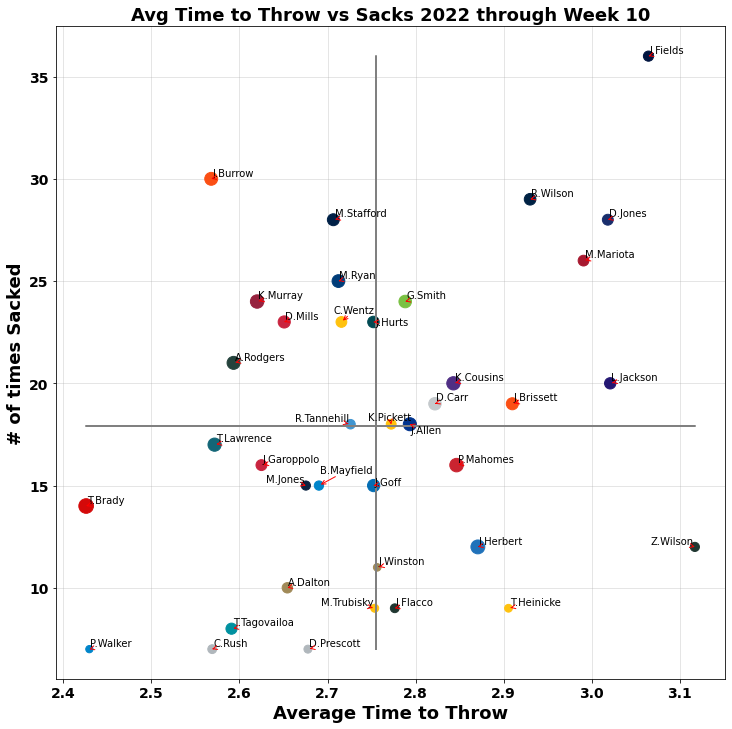

In [9]:
qb_graph = qb_data_full[["player_short_name", "avg_time_to_throw", "Sacked", "team_abbr", "attempts"]]

x = qb_graph["avg_time_to_throw"]
y = qb_graph["Sacked"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=18, fontweight = "bold")
plt.ylabel('# of times Sacked', fontsize=18, fontweight = "bold")
plt.title('Avg Time to Throw vs Sacks 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgTimeThrow_vs_Sacks.png', dpi=400)
plt.show()

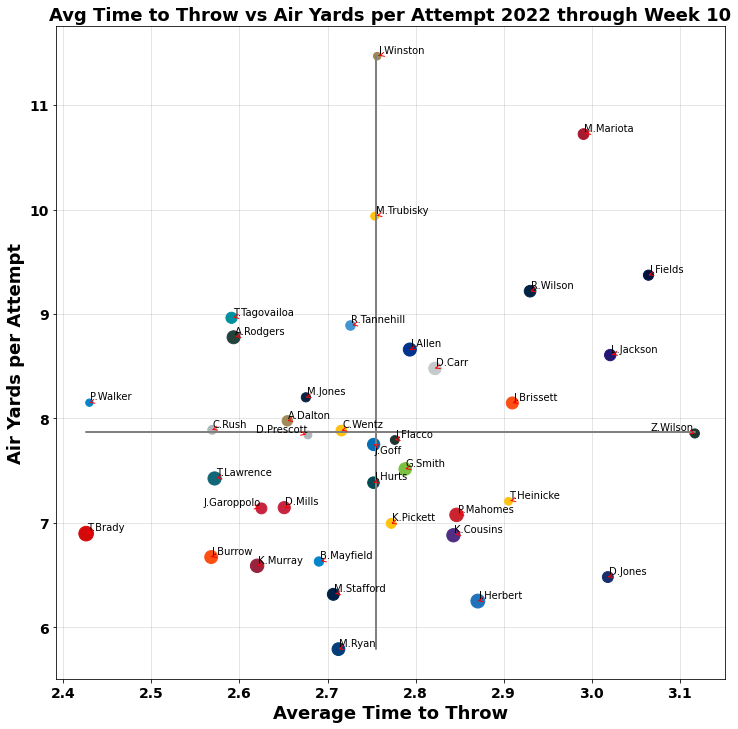

In [10]:
qb_graph = qb_data_full[["player_short_name", "avg_time_to_throw", "Air Yards", "team_abbr", "attempts"]]

x = qb_graph["avg_time_to_throw"]
y = qb_graph["Air Yards"]/qb_graph["attempts"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=18, fontweight = "bold")
plt.ylabel('Air Yards per Attempt', fontsize=18, fontweight = "bold")
plt.title('Avg Time to Throw vs Air Yards per Attempt 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgTimeThrow_vs_AirYardsAttempt.png', dpi=400)
plt.show()

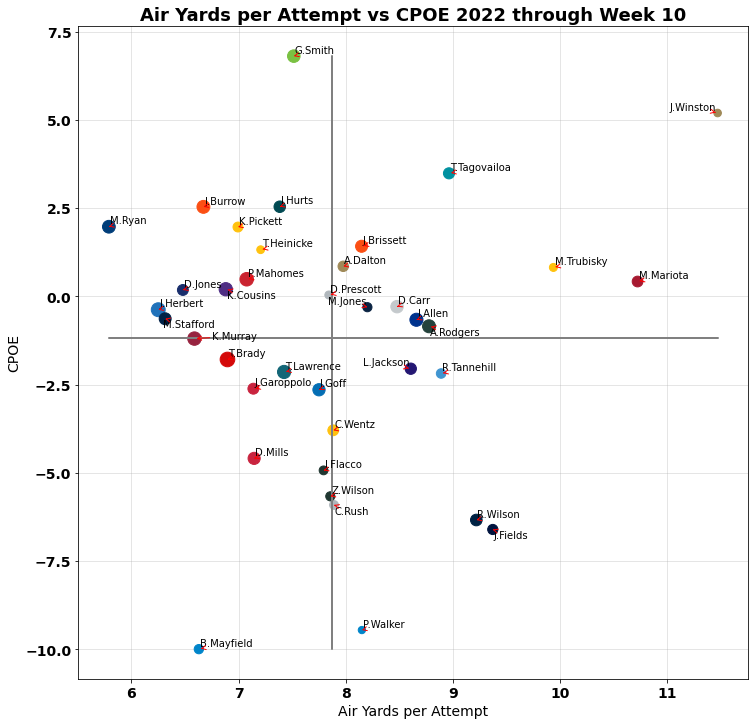

In [11]:
qb_graph = qb_data_full[["player_short_name", "completion_percentage_above_expectation", "Air Yards", "team_abbr", "attempts"]]

y = qb_graph["completion_percentage_above_expectation"]
x = qb_graph["Air Yards"]/qb_graph["attempts"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.ylabel('CPOE', fontsize=14)
plt.xlabel('Air Yards per Attempt', fontsize=14)
plt.title('Air Yards per Attempt vs CPOE 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AirYardsAttempt_vs_CPOE.png', dpi=400)
plt.show()

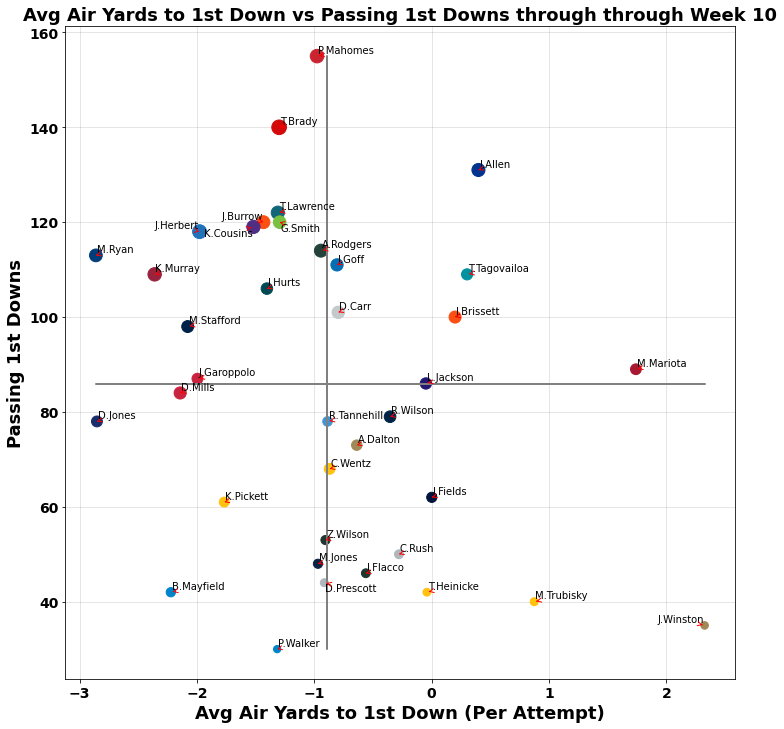

In [12]:
qb_graph = qb_data_full[["player_short_name", "avg_air_yards_to_sticks", "Passing First Downs", "team_abbr", "attempts"]]

x = qb_graph["avg_air_yards_to_sticks"]
y = qb_graph["Passing First Downs"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Air Yards to 1st Down (Per Attempt)', fontsize=18, fontweight = "bold")
plt.ylabel('Passing 1st Downs', fontsize=18, fontweight = "bold")
plt.title('Avg Air Yards to 1st Down vs Passing 1st Downs through through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

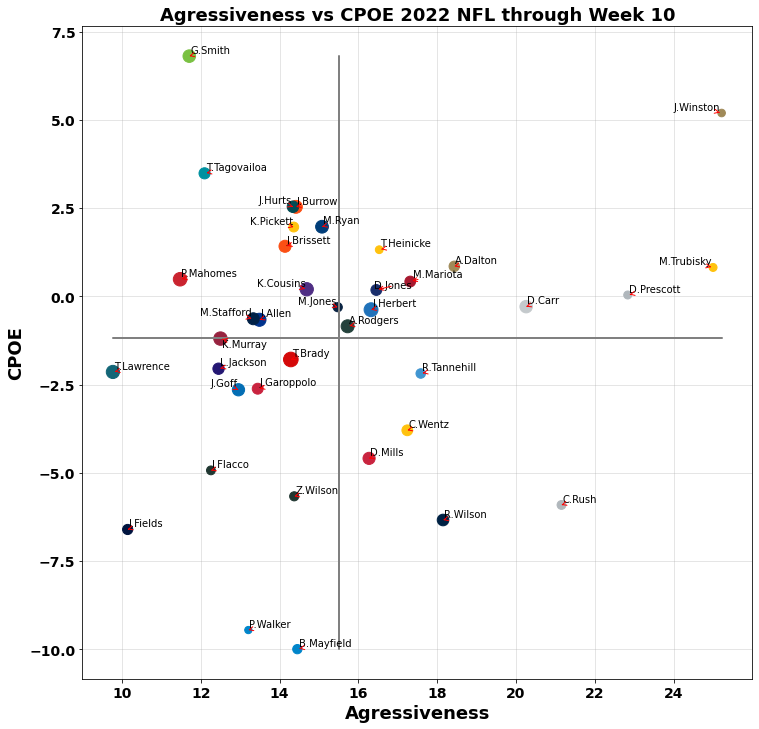

In [13]:
qb_graph = qb_data_full[["player_short_name", "aggressiveness", "completion_percentage_above_expectation", "team_abbr",
                         "attempts"]]

x = qb_graph["aggressiveness"]
y = qb_graph["completion_percentage_above_expectation"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Agressiveness', fontsize=18, fontweight = "bold")
plt.ylabel('CPOE', fontsize=18, fontweight = "bold")
plt.title('Agressiveness vs CPOE 2022 NFL through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/Agressiveness_vs_CPOE.png', dpi=400)
plt.show()

In [14]:
qb_data_pfr = pd.read_csv("../Resources/advstats_season_pass.csv")
qb_data_pfr = qb_data_pfr.loc[qb_data_pfr["season"] == 2022, :]
qb_data_pfr = qb_data_pfr.drop(columns=["team", "pass_attempts", "season", "pfr_id"])
qb_data_all = qb_data_full.merge(qb_data_pfr, left_on='player_display_name', right_on='player')
qb_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr',
       'avg_time_to_throw', 'avg_completed_air_yards',
       'avg_intended_air_yards', 'avg_air_yards_differential',
       'aggressiveness', 'max_completed_air_distance',
       'avg_air_yards_to_sticks', 'attempts', 'pass_yards', 'pass_touchdowns',
       'interceptions', 'passer_rating', 'completions',
       'completion_percentage', 'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_short_name', 'Sacked',
       'Sack Yards', 'Sack Fumbles', 'Sack Fumbles Lost', 'Air Yards',
       'Passing YAC', 'Passing First Downs', 'Passing EPA', '2Pt Conversions',
       'PACR', 'Games Played', 'player', 'throwaways', 'spikes', 'drops',
       'drop_pct', 'bad_throws', 'bad_throw_pct', 'pocket_time',
       'times_blitzed', 'times_hurried', 'times_hit', 'times_pressured',
       'pressure_pct', 'batted_balls', 'on_tgt_throws', 

In [15]:
qb_data_all

,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,...,on_tgt_throws,on_tgt_pct,rpo_plays,rpo_yards,rpo_pass_att,rpo_pass_yards,rpo_rush_att,rpo_rush_yards,pa_pass_att,pa_pass_yards
0,Kyler Murray,QB,ARI,2.620039,4.003292,6.491715,-2.488423,12.500000,38.988774,-2.360029,...,268.0,77.9,20.0,234.0,13.0,177.0,7.0,57.0,24.0,204.0
1,Marcus Mariota,QB,ATL,2.990664,7.096084,10.535268,-3.439184,17.316017,46.615539,1.740625,...,159.0,71.3,95.0,727.0,64.0,557.0,26.0,170.0,40.0,284.0
2,Lamar Jackson,QB,BAL,3.020969,6.015437,9.033238,-3.017800,12.451362,58.484966,-0.048730,...,180.0,74.4,55.0,547.0,32.0,290.0,22.0,257.0,56.0,456.0
3,Josh Allen,QB,BUF,2.793453,7.158864,8.839327,-1.680464,13.489736,60.141973,0.398960,...,207.0,62.3,18.0,161.0,18.0,161.0,0.0,0.0,51.0,519.0
4,Baker Mayfield,QB,CAR,2.690237,4.620510,6.693952,-2.073442,14.450867,54.658197,-2.222216,...,109.0,66.1,3.0,12.0,2.0,6.0,1.0,6.0,27.0,181.0
5,Justin Fields,QB,CHI,3.064420,6.447623,9.301450,-2.853827,10.144928,58.974003,0.001450,...,125.0,62.2,43.0,189.0,29.0,129.0,13.0,60.0,41.0,419.0
6,Joe Burrow,QB,CIN,2.567916,5.419313,7.028532,-1.609219,14.414414,50.203717,-1.433242,...,255.0,78.5,21.0,246.0,20.0,246.0,0.0,0.0,34.0,296.0
7,Jacoby Brissett,QB,CLE,2.909826,6.831946,8.813102,-1.981156,14.137931,55.884428,0.199964,...,207.0,75.5,4.0,12.0,4.0,12.0,0.0,0.0,54.0,546.0
8,Dak Prescott,QB,DAL,2.677732,6.322716,7.923333,-1.600617,22.834646,37.769370,-0.914065,...,91.0,74.6,11.0,80.0,7.0,55.0,4.0,25.0,24.0,182.0
9,Cooper Rush,QB,DAL,2.569058,6.582778,8.410397,-1.827620,21.153846,47.203687,-0.278344,...,102.0,66.7,2.0,6.0,1.0,4.0,1.0,2.0,37.0,324.0


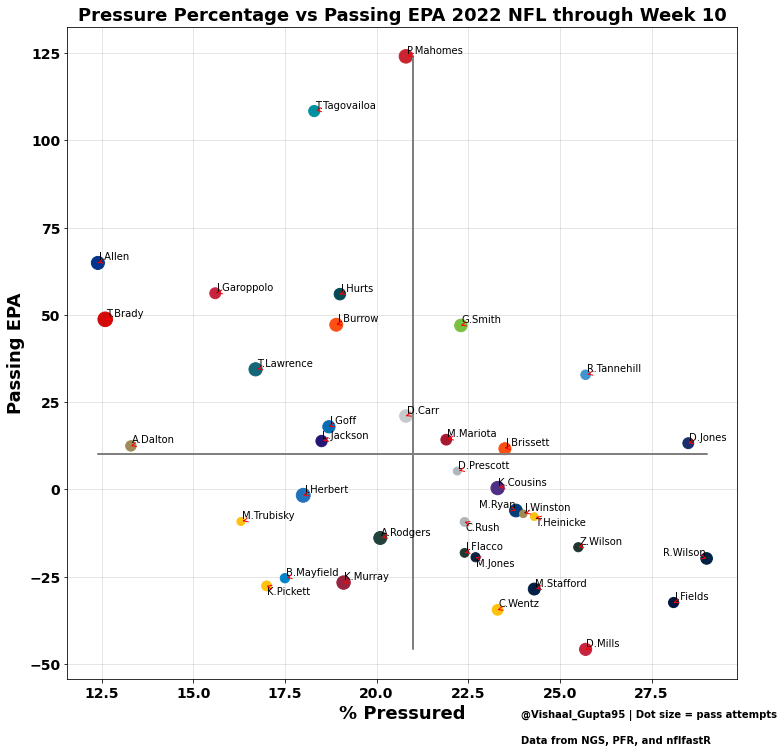

In [16]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "Passing EPA", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["Passing EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Passing EPA', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs Passing EPA 2022 NFL through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
plt.figtext(.65, .08, '@Vishaal_Gupta95 | Dot size = pass attempts', fontsize=10, fontweight = "bold")
plt.figtext(.65, .05, 'Data from NGS, PFR, and nflfastR', fontsize=10, fontweight = "bold")
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/PressurePercentage_vs_PassEPA.png', dpi=400)
plt.show()

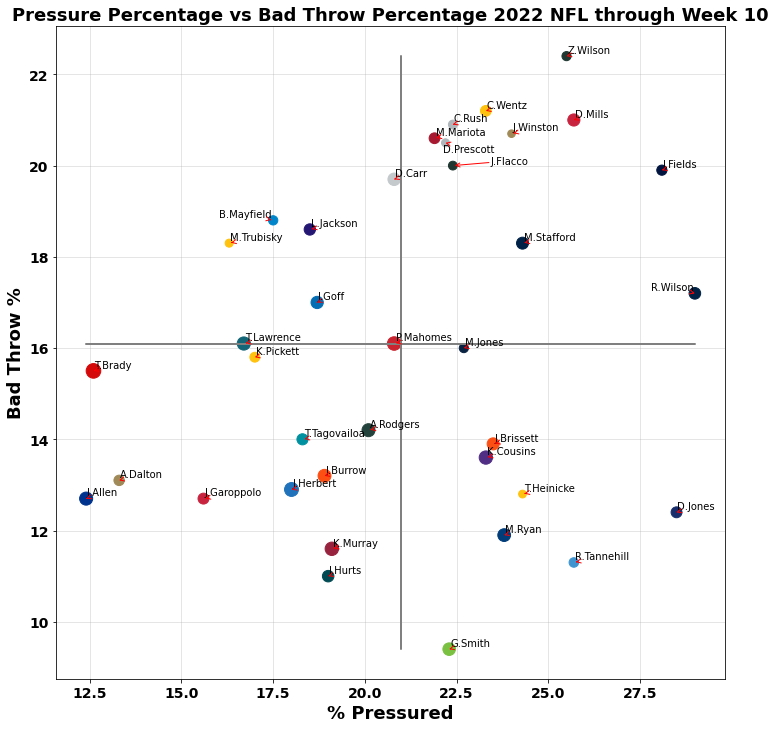

In [17]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "bad_throw_pct", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["bad_throw_pct"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Bad Throw %', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs Bad Throw Percentage 2022 NFL through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

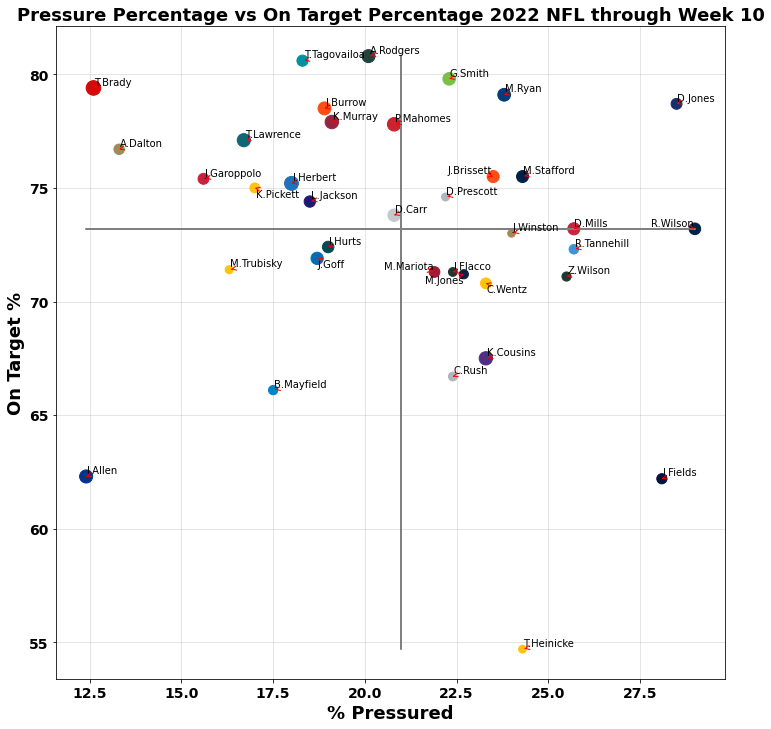

In [18]:
qb_graph = qb_data_all[["player_short_name", "pressure_pct", "on_tgt_pct", "team_abbr",
                         "attempts"]]

x = qb_graph["pressure_pct"]
y = qb_graph["on_tgt_pct"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('On Target %', fontsize=18, fontweight = "bold")
plt.title('Pressure Percentage vs On Target Percentage 2022 NFL through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

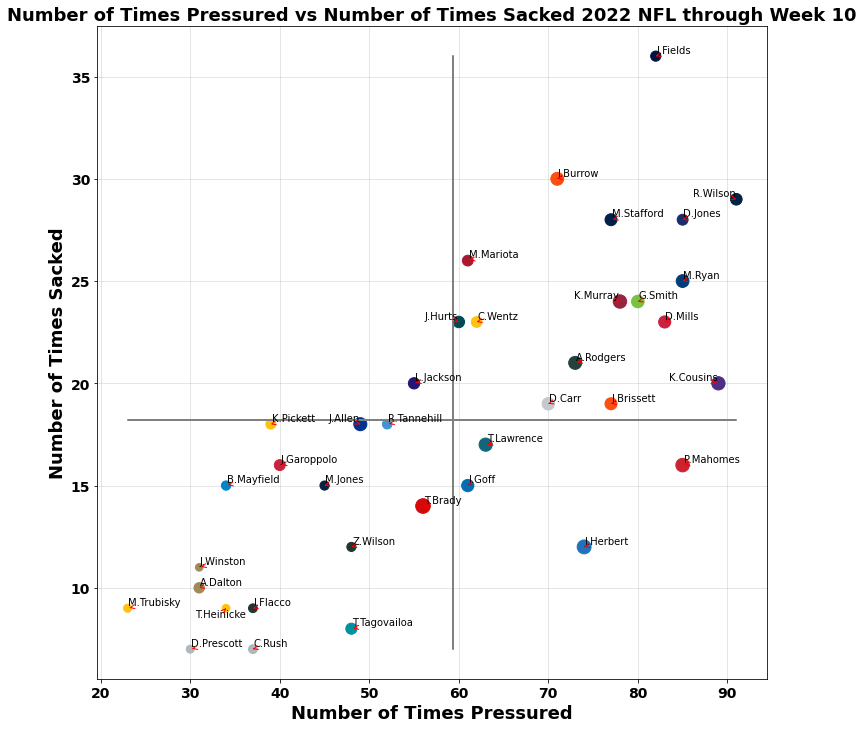

In [19]:
qb_graph = qb_data_all[["player_short_name", "times_pressured", "Sacked", "team_abbr",
                         "attempts"]]

x = qb_graph["times_pressured"]
y = qb_graph["Sacked"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Number of Times Pressured', fontsize=18, fontweight = "bold")
plt.ylabel('Number of Times Sacked', fontsize=18, fontweight = "bold")
plt.title('Number of Times Pressured vs Number of Times Sacked 2022 NFL through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

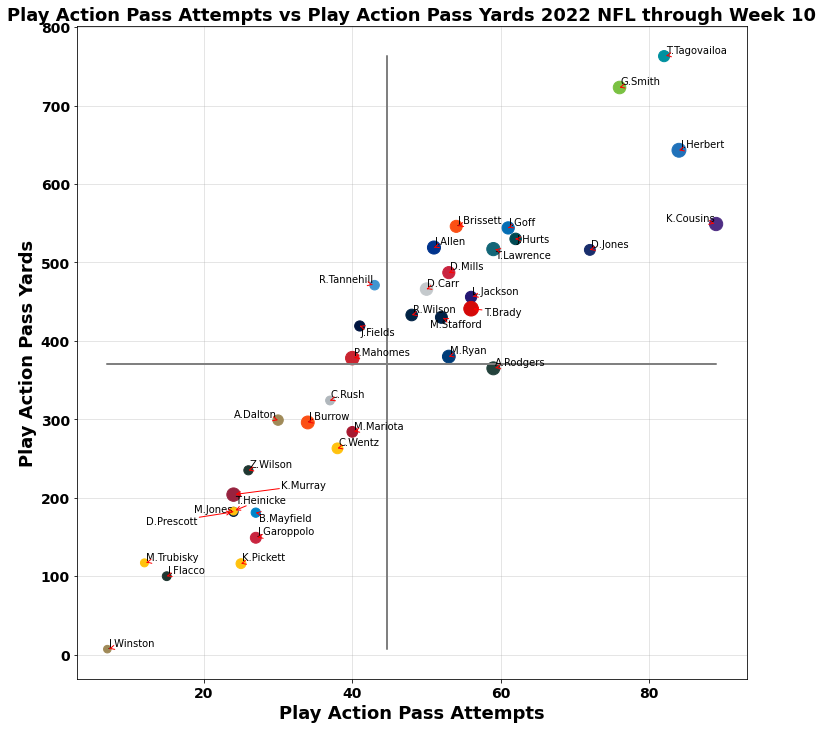

In [20]:
qb_graph = qb_data_all[["player_short_name", "pa_pass_att", "pa_pass_yards", "team_abbr",
                         "attempts"]]

x = qb_graph["pa_pass_att"]
y = qb_graph["pa_pass_yards"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Play Action Pass Attempts', fontsize=18, fontweight = "bold")
plt.ylabel('Play Action Pass Yards', fontsize=18, fontweight = "bold")
plt.title('Play Action Pass Attempts vs Play Action Pass Yards 2022 NFL through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown.png', dpi=400)
plt.show()

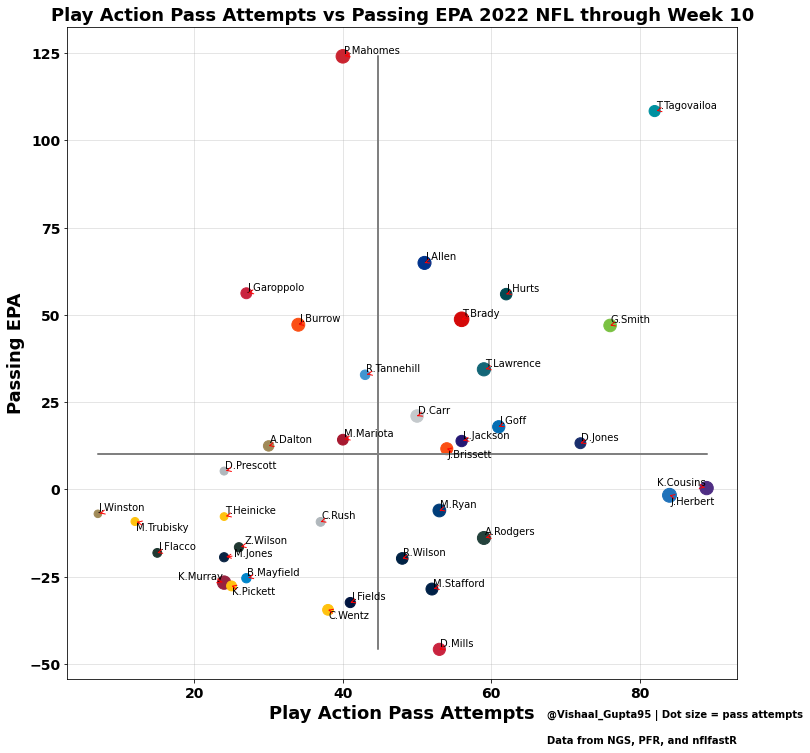

In [27]:
qb_graph = qb_data_all[["player_short_name", "pa_pass_att", "Passing EPA", "team_abbr",
                         "attempts"]]

x = qb_graph["pa_pass_att"]
y = qb_graph["Passing EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in qb_graph["team_abbr"]:
    color.append(team_color[team])
    
size = qb_graph["attempts"].to_numpy()
s = [s / 2 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Play Action Pass Attempts', fontsize=18, fontweight = "bold")
plt.ylabel('Passing EPA', fontsize=18, fontweight = "bold")
plt.title('Play Action Pass Attempts vs Passing EPA 2022 NFL through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(qb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    
plt.figtext(.68, .08, '@Vishaal_Gupta95 | Dot size = pass attempts', fontsize=10, fontweight = "bold")
plt.figtext(.68, .05, 'Data from NGS, PFR, and nflfastR', fontsize=10, fontweight = "bold")
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

#plt.savefig('Images/PApassAttempts_vs_PassEPA.png', dpi=400)
plt.show()